# Exercise 03 - Autoregressive Integrated Moving Average Models

- The result will be evaluated from a report in Jupiter, which must be found in a public GitHub repository.
- The project must be carried out in the groups assigned in class.
- Use clear and rigorous procedures.
- Due date: 22, 2020, 11:59 pm, through Sicua + (Upload repository link)

# 03.1 - Plot the ACF and PACF of the 4 series in data_arma.csv
### Try to say to which AR or MA process each series belong

In [1]:
import pandas as pd
data=pd.read_csv('data_arma.csv',index_col=0)
data.head()

,ts1,ts2,ts3,ts4
0,0.533570,-0.126804,-0.802837,1.812825
1,1.240130,1.314360,-0.595602,0.042764
2,1.618598,1.405994,0.127180,-1.759427
3,1.140465,3.132621,0.958586,-0.456798
4,0.481561,3.179083,0.164598,-1.254790


In [4]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

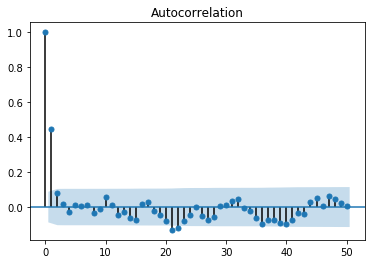

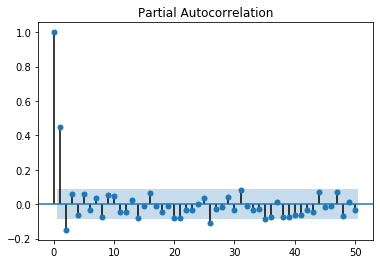

In [4]:
ts1 = pd.DataFrame(data['ts1'])

plot_acf(ts1, lags=50);
plot_pacf(ts1, lags=50);

In [ ]:
# Esta primera serie correspondería a un modelo MA(1).

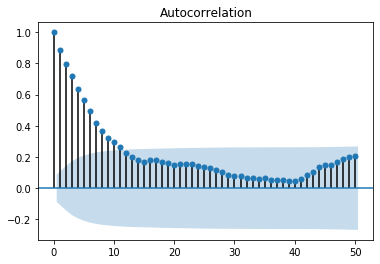

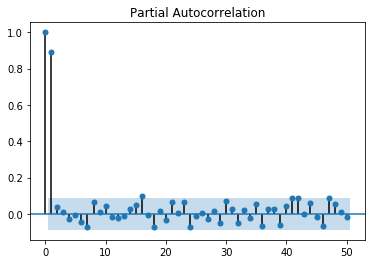

In [5]:
ts2 = pd.DataFrame(data['ts2'])

plot_acf(ts2, lags=50);
plot_pacf(ts2, lags=50);

In [ ]:
# Dada las correlaciones mostradas en la gráfica que tienen un comportamiento descendiente, se puede decir que corresponde 
# a un proceso AR(1).

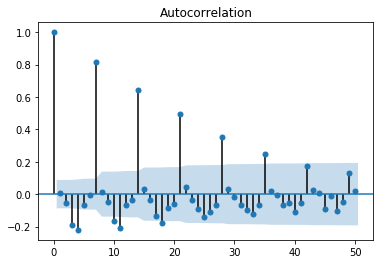

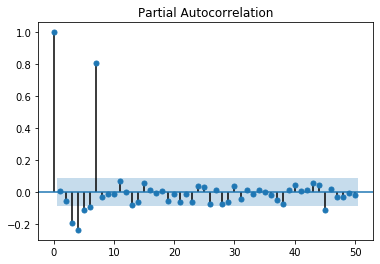

In [6]:
ts3 = pd.DataFrame(data['ts3'])

plot_acf(ts3, lags=50);
plot_pacf(ts3, lags=50);

In [ ]:
# En esta serie de tiempo se muestra una correlación cada 7 periodos, por lo que puede decirse que corresponde a un 
# proceso autorregresivo de orden 7.

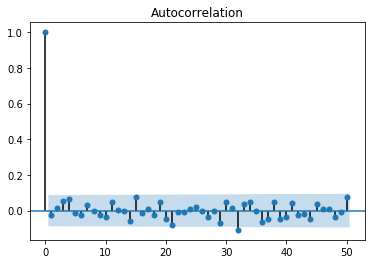

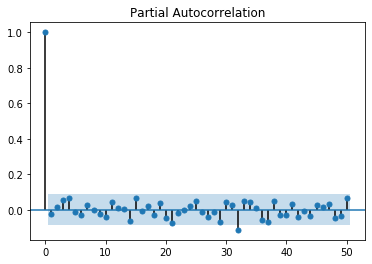

In [7]:
ts4 = pd.DataFrame(data['ts4'])

plot_acf(ts4, lags=50);
plot_pacf(ts4, lags=50);

In [ ]:
# Para la última serie, dado que no se muestra ninguna correlación significativa, los datos corresponden a una serie con
# información aleatoria o una caminata aleatoria.

# 03.2 - Using the shampoo dataset:
## Find the parameters p, d q that minimizes the rmse of the rolling forecast


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales, dtype: float64


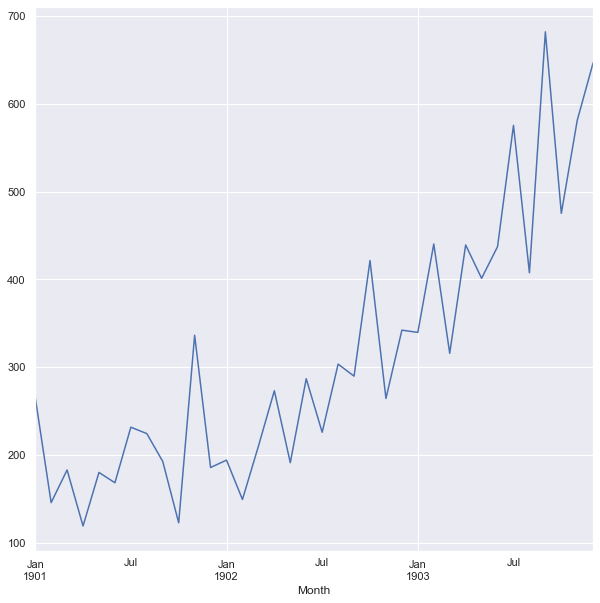

In [6]:
def parser(x):
    return pd.datetime.strptime('190'+x, '%Y-%m')
 
series = pd.read_csv('../datasets/shampoo.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
print(series.head())
series.plot(figsize=(10, 10));

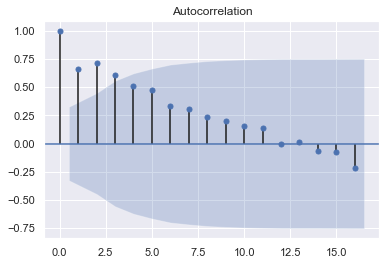

In [7]:
plot_acf(series);

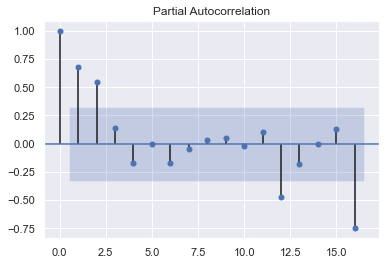

In [8]:
plot_pacf(series);

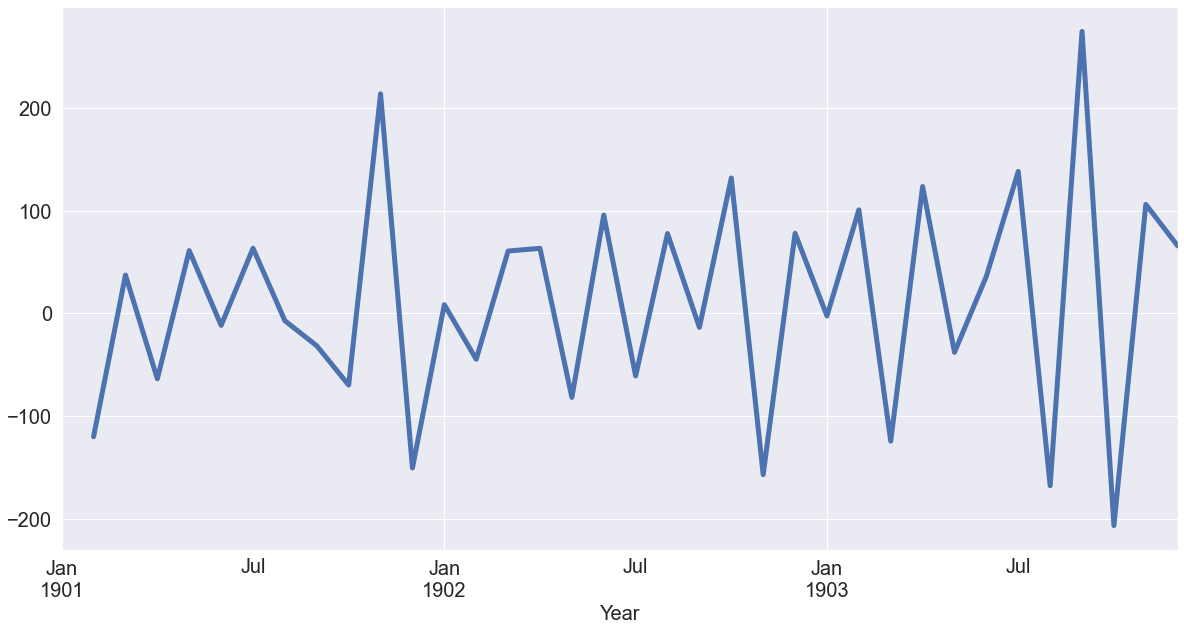

In [9]:
series.diff().plot(figsize=(20,10), linewidth=5, fontsize=20) # La forma de quitar tendencia, es restando la observación en t de la observación t-1
plt.xlabel('Year', fontsize=20);

In [10]:
from statsmodels.tsa.arima_model import ARIMA
# fit model
model = ARIMA(series, order=(2,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Sales   No. Observations:                   35
Model:                 ARIMA(2, 1, 0)   Log Likelihood                -197.814
Method:                       css-mle   S.D. of innovations             67.833
Date:                Sat, 20 Jun 2020   AIC                            403.628
Time:                        15:02:51   BIC                            409.849
Sample:                    02-01-1901   HQIC                           405.775
                         - 12-01-1903                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            11.6504      4.907      2.374      0.024       2.034      21.267
ar.L1.D.Sales    -1.0223      0.167     -6.109      0.000      -1.350      -0.694
ar.L2.D.Sales    -0.3655      0.167     

C:\Users\Cindy\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Cindy\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


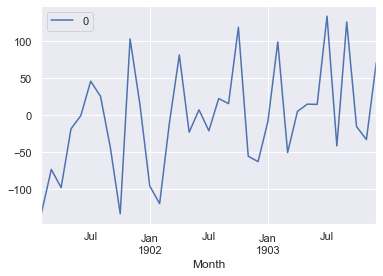

In [11]:
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()

# Test normalidad Bruch Pagan 
# La media todavía muestra tendencia

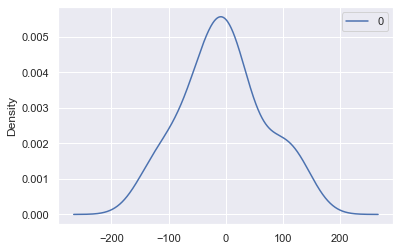

                0
count   35.000000
mean    -3.927333
std     71.118405
min   -132.795705
25%    -47.082981
50%     -8.308474
75%     23.822062
max    133.295961


In [12]:
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

In [13]:
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()


for t in range(len(test)):
	model = ARIMA(history, order=(2,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))

predicted=384.283240, expected=342.300000
predicted=316.888888, expected=339.700000
predicted=337.349540, expected=440.400000
predicted=378.283318, expected=315.900000
predicted=413.321038, expected=439.300000
predicted=370.978181, expected=401.300000
predicted=425.757106, expected=437.400000
predicted=429.401365, expected=575.500000
predicted=474.580654, expected=407.600000
predicted=542.710044, expected=682.000000
predicted=480.813952, expected=475.300000
predicted=634.327308, expected=581.300000
predicted=561.051489, expected=646.900000


In [14]:
from sklearn.metrics import mean_squared_error
error = mean_squared_error(test, predictions)**0.5
print('Test MSE: %.3f' % error)

Test MSE: 75.432


In [15]:
order=[0,1,2,3,4,5,6]
mse=list()

for j in order:
    X = series.values
    size = int(len(X) * 0.66)
    train, test = X[0:size], X[size:len(X)]
    history = [x for x in train]
    predictions = list()
    
    print(j)

    for t in range(len(test)):
        
        model = ARIMA(history, order=(j,1,0))
        model_fit = model.fit(disp=0)
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = test[t]
        history.append(obs)
        #print('predicted=%f, expected=%f' % (yhat, obs))
        
    mse.append(mean_squared_error(test, predictions)**0.5) 
print(mse)

#probar coeficiente del MA

0
1
2
3
4
5
6
[134.17590331338326, 84.38822029565345, 75.43161348791043, 83.65966948471767, 81.54504122389166, 83.41658004303335, 82.5231639672985]
